In [1]:
#seaborn is required for the traceplots
import pysal as ps
import hlm
from hlm.verify import Delta_members
from hlm.plotting.traces import plot_trace
import numpy as np
import seaborn as sns
sns.set_palette('Set1', desat=.8)
import matplotlib.pyplot as plt
import multiprocessing as mp
%matplotlib inline

df = ps.pdio.read_files(ps.examples.get_path('south.shp'))
df = df[df.STATE_NAME != 'District of Columbia']
X = df[['GI89', 'BLK90', 'HR90']].values
N = X.shape[0]
Z = df.groupby('STATE_NAME')['FH90'].mean()
Z = Z.values.reshape(-1,1)
J = Z.shape[0]

Y = df.DNL90.values.reshape(-1,1)
W2 = ps.queen_from_shapefile(ps.examples.get_path('us48.shp'), 
                             idVariable='STATE_NAME')
W2 = ps.w_subset(W2, ids=df.STATE_NAME.unique().tolist())
W1 = ps.queen_from_shapefile(ps.examples.get_path('south.shp'),
                             idVariable='FIPS')
W1 = ps.w_subset(W1, ids=df.FIPS.tolist())

W1.transform = 'r'
W2.transform = 'r'
membership = df.STATE_NAME.apply(lambda x: W2.id_order.index(x)).values
Delta, membership = Delta_members(None, membership, W1.n, W2.n)

In [2]:
WZ = ps.lag_spatial(W2, Z)
ZDurbin = np.hstack((Z, WZ))

In [3]:
a = hlm.both.MVCM(Y,X,Z=ZDurbin, membership=membership, n_samples=0, 
                  tuning=1000)

In [4]:
a.sample(1000, n_jobs=4)

In [5]:
len(a.trace.chains[0]['Tau2'])

1000

In [6]:
a.sample(1000)

In [7]:
type(a.trace)

hlm.abstracts.NewTrace

In [8]:
len(a.trace.chains[0]['Tau2'])

2000

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


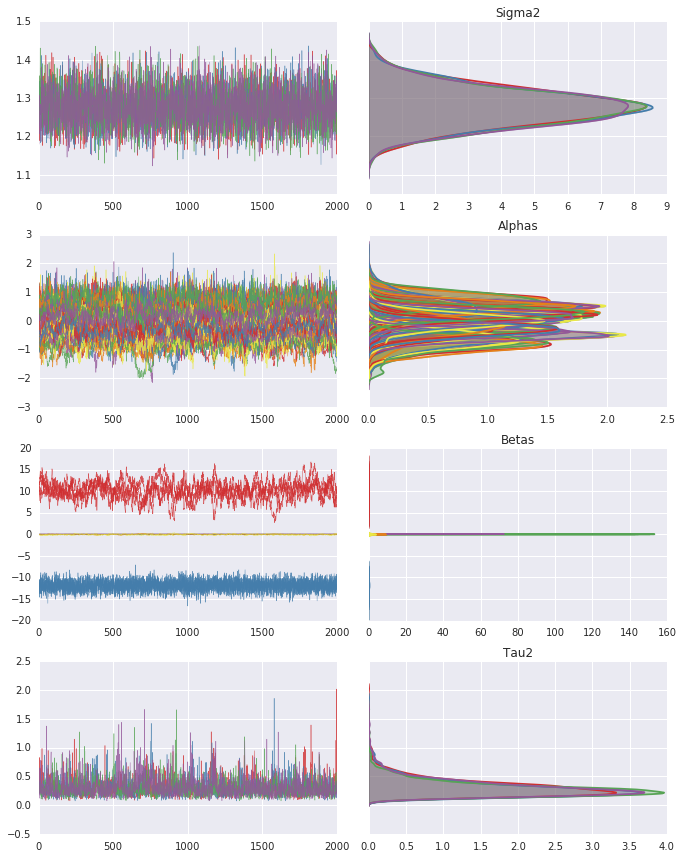

In [9]:
a.trace.plot()

In [10]:
a.trace[2,['Tau2', 'Betas'], -1]

{'Betas': array([[  7.02267664e+00],
        [ -1.14908629e+01],
        [  3.58112755e-03],
        [  3.47981642e-02],
        [ -2.58778704e-02],
        [  1.10715744e-01]]), 'Tau2': 0.23814156547428747}